<a href="https://colab.research.google.com/github/RomuloPaiva01/ICA/blob/master/cocktail_party.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.io.wavfile import read, write
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA


path1 = 'g1.wav'
path2 = 'news.wav'

audio1 = read(path1)
sample_rate = audio1[0]
audio1 = np.array(audio1[1])

audio2 = read(path2)
audio2 = np.array(audio2[1])
'''
audio1 = [(x[0] + x[1])/2 for x in audio1]
audio2 = [(x[0] + x[1])/2 for x in audio2]
'''
audio1 = audio1[:,0]
audio2 = audio2[:,0]


audio1 = np.array(audio1)
audio2 = np.array(audio2)


#I want the audios to have the same lenght, so I will take the small len

short = min(len(audio1), len(audio2))


audio1 = audio1[:short]
audio2 = audio2[:short]


n_components = 2


In [2]:
audio1

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

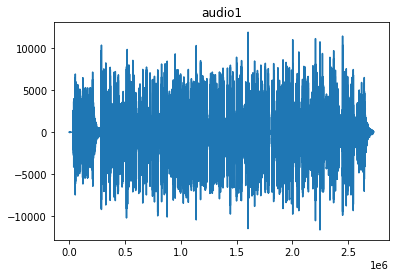

In [3]:
#plotting the mixture signal
plt.plot(audio1)
plt.title('audio1')
plt.show()

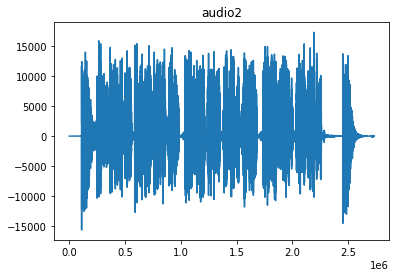

In [4]:
#plotting the mixture signal
plt.plot(audio2)
plt.title('audio2')
plt.show()

In [5]:
#creating the mixture
A = np.array([[0.5, 0.5],[0.7,0.3]])

s  = np.array([audio1, audio2])

x = A @ s

#x = s @ A.T

In [6]:
x

array([[ 0. ,  0. ,  0. , ..., -5.5,  5. ,  6. ],
       [ 0. ,  0. ,  0. , ..., -3.3,  3. ,  3.6]])

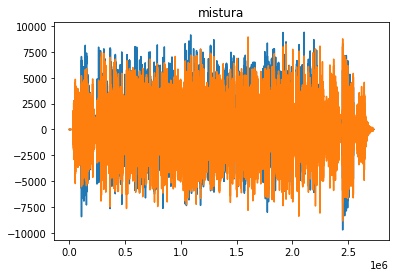

In [7]:
#plotting the mixture signal
plt.plot(x.T)
plt.title('mistura')
plt.show()

In [8]:
#if I want to see the mixture before
mixture = ((x[0] + x[0].min()) * (2 ** 15) / x[0].ptp()).astype(np.int16)

In [9]:
transformer = FastICA(n_components= n_components, max_iter= 1000, random_state=0, whiten = True, algorithm='parallel', fun = 'cube')

s_estimation = transformer.fit_transform(x.T)

s_estimation

array([[-1.09257789e-08, -5.39300010e-07],
       [-1.09257789e-08, -5.39300010e-07],
       [-1.09257789e-08, -5.39300010e-07],
       ...,
       [-2.04232571e-09,  2.52231472e-06],
       [-1.90016454e-08, -3.32258613e-06],
       [-2.06168187e-08, -3.87924335e-06]])

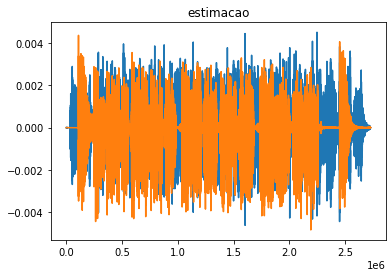

In [10]:
#plotting the mixture signal
plt.plot(s_estimation)
plt.title('estimacao')
plt.show()

In [11]:
#scale = min(audio2)/ min(s_estimation[:, 0])

#s_estimation[:, 0] = scale * s_estimation[:, 0]

s1 = ((s_estimation[:, 0] + s_estimation[:, 0].min()) * (2 ** 15) / s_estimation[:, 0].ptp()).astype(np.int16)

s2 = ((s_estimation[:, 1] + s_estimation[:, 1].min()) * (2 ** 15) / s_estimation[:, 1].ptp()).astype(np.int16)

In [14]:
#transforming in the right scale
write('audio1.wav', sample_rate, s1)
write('audio2.wav', sample_rate, s2)
write('audio_mistura.wav', sample_rate, mixture)

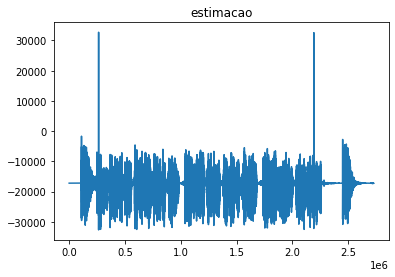

In [13]:
plt.plot(s2)
plt.title('estimacao')
plt.show()